### XOR problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt


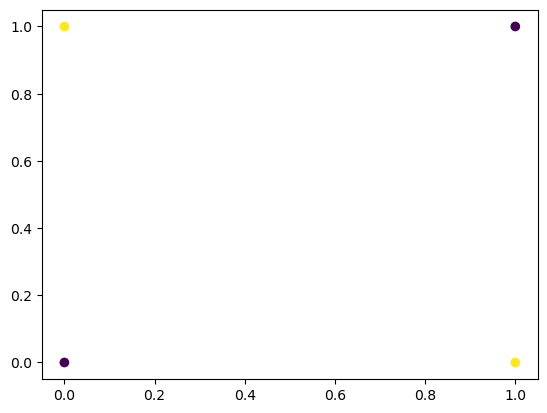

In [2]:
X = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
y = np.array([0, 1, 1, 0])
y =y.reshape(-1,1)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Construct a neural network with 1 hidden layer of 2 nodes with active fuction ,find the best parameters : active function, learning rate and random seed

In [4]:
from layer import L_layer_model_Classifier
from utils import plot_decision_boundary
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [5]:
np.random.seed(666)
Learning_rates = [0.01,0.1, 1.0,10]
epoch = 1000
active_function = ['relu','sigmoid']

best_cost = float('inf')
best_p ={}
param = []
dtype = np.dtype([
    (('active_function', 'Active function'), 'U10'),
    (('learning_rate', 'Learning rate'), 'f4'),
    (('seed', 'Seed'), 'i4'),
    (('score', 'Score'), 'f8'),
    (('cost', 'Cost'), 'f8'),
])
for af in active_function:
    layer_dims=[2,2,1]
    for lr in Learning_rates:
        for seed in range(1,30):
            model = L_layer_model_Classifier(layer_dims=layer_dims,active_function=af,learning_rate=lr,random_state=seed)
            cost=model.fit(X,y,epochs = epoch)
            score = model.score(X,y)
            p = {'active_function':af,'learning_rate':lr,'seed':seed,'score':score,'cost':cost}
            param.append((af, lr,seed,score,cost))
            if cost<best_cost:
                best_cost = cost
                best_score = score
                best_p = {'active_function':af,'learning_rate':lr,'seed':seed}
#                 if score==1:
#                     break



print("best_p = ",best_p)
print("best_score = ",best_score)            
print("best_cost = ",best_cost)

param_array  = np.array(param,dtype=dtype)
df = pd.DataFrame(param_array )
df

best_p =  {'active_function': 'relu', 'learning_rate': 10, 'seed': 29}
best_score =  1.0
best_cost =  0.0005717701853476039


,Active function,Learning rate,Seed,Score,Cost
0,relu,0.01,1,0.50,0.632575
1,relu,0.01,2,0.50,0.705805
2,relu,0.01,3,0.50,0.700614
3,relu,0.01,4,0.75,0.609733
4,relu,0.01,5,0.50,0.693232
...,...,...,...,...,...
227,sigmoid,10.00,25,0.50,0.350120
228,sigmoid,10.00,26,1.00,0.004367
229,sigmoid,10.00,27,1.00,0.004603
230,sigmoid,10.00,28,1.00,0.004251


we get the best parameter By the above method. 

**'active_function': 'relu', 'learning_rate': 10, 'random seed': 29**

Now we construct the optimal parametric model and draw decision boundary 

1.0


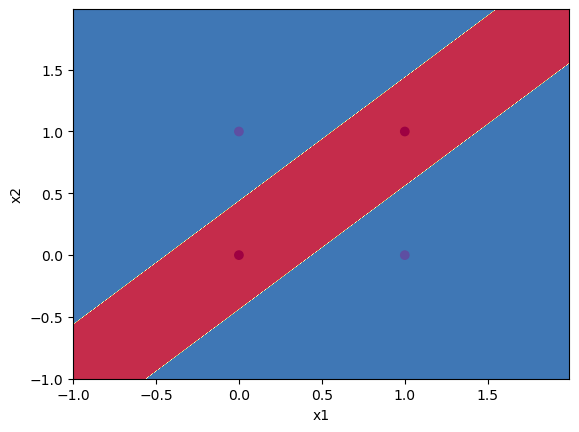

In [6]:
XOR_solved = L_layer_model_Classifier(layer_dims = [2,2,1],active_function= 'relu',learning_rate=10.0,random_state=29)

XOR_solved.fit(X, y, epochs=1000)
pred = model.predict(X)
score = XOR_solved.score(X,y)
print(score)
plot_decision_boundary(XOR_solved,X,y)
plt.show()

In [7]:
XOR_solved.w=XOR_solved.model.layers[0].weights
XOR_solved.w

array([[-3.98719196e-03, -1.47875726e-03],
       [-3.49666014e+00,  3.55167242e+00],
       [ 3.49242240e+00, -3.55287814e+00]])

As shown in the figure above, we can solve the XOR problem by building a  1 hidden layer of 2 nodes neural network with 'active_function': 'relu', 'learning_rate': 10, 'random seed': 29